In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os 
import math
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from itertools import product

plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis

In [2]:
# Loading and describing data

df = pd.read_csv('BTC_Dataset.csv')
df.describe(include= 'all')

,time,open_x,high_x,low_x,close_x,Basis_x,Volume_x,RSI_x,MACD_x,OnBalanceVolume_x,...,btc_s2f,btc_s2f_price,nlp_compound,nlp_subjectivity,nlp_polarity,sentiment_Extreme Fear,sentiment_Extreme Greed,sentiment_Fear,sentiment_Greed,sentiment_Neutral
count,1351,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1.351000e+03,1351.000000,1351.000000,1.351000e+03,...,1351.000000,1.351000e+03,1351.000000,1351.000000,1351.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
unique,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,30-08-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,15419.137746,15892.137021,14874.215714,15443.776925,15211.242159,3.535644e+07,52.373399,167.901478,1.111782e+08,...,37.699270,6.025364e+04,0.126159,0.357700,0.091097,0.230233,0.129457,0.348837,0.200000,0.091473
std,NaN,14960.985174,15454.836966,14372.544954,14984.382028,14638.901379,6.339454e+07,13.998728,1115.385080,6.148196e+08,...,16.384657,1.106147e+05,0.127980,0.084957,0.065123,0.421145,0.335836,0.476787,0.400155,0.288392
min,NaN,3212.871369,3268.953581,3158.130001,3212.983304,3500.468075,6.738494e+04,10.494657,-5072.114792,-2.322863e+09,...,19.075391,3.186316e+03,-0.367350,0.033333,-0.187500,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6840.685000,7083.782259,6654.606617,6842.171250,6919.572460,9.030960e+05,42.969401,-223.725795,-3.173856e+07,...,25.226569,8.149701e+03,0.051025,0.300613,0.050808,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,9203.767500,9378.980000,8987.300000,9203.717500,9217.894125,5.366065e+06,51.338284,13.043548,2.911508e+06,...,28.266250,1.194426e+04,0.129468,0.348666,0.084294,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,13068.738750,13493.364055,12428.250000,13067.623750,12854.437455,3.319154e+07,61.424859,391.821770,2.904837e+08,...,53.349028,1.009353e+05,0.205558,0.411734,0.126859,0.000000,0.000000,1.000000,0.000000,0.000000


In [3]:
# Setting index and extracting relevant features for time series analysis

df = df.set_index('time')
df = df.iloc[:,0:4]


<Figure size 432x288 with 0 Axes>

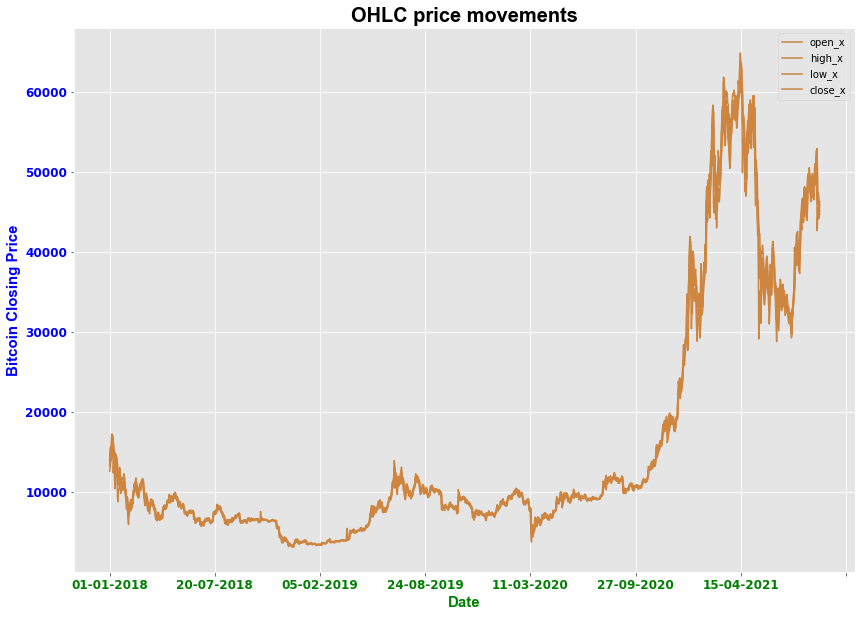

In [4]:
# Plotting movement of OHLC over the period 2017-2021

ax = plt.figure()

df.loc[:,df.columns].plot(figsize = (14,10),color='peru')
plt.title('OHLC price movements', fontfamily = 'arial', fontsize = 20,fontweight= 'bold', color= 'black')
plt.ylabel('Bitcoin Closing Price', color = 'blue', fontfamily = 'arial', fontsize=15,fontweight= 'bold')
plt.xlabel('Date', color='green',fontfamily = 'arial', fontsize=15,fontweight= 'bold')
plt.xticks(color='green',size=12,fontweight= 'semibold')
plt.yticks(color='blue',size=12,fontweight= 'semibold')
plt.show()

In [5]:
# Converting index to datetime format
df.index = pd.to_datetime(df.index)

In [6]:
# Resampling to monthly frequency
df_month = df.resample('M').mean()

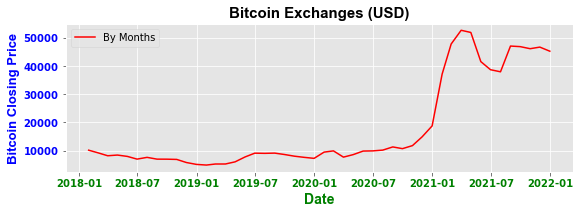

In [7]:
# Plotting subplots of OHLC by months
fig = plt.figure(figsize=[20,6])

plt.subplot(222)
plt.title('Bitcoin Exchanges (USD)', fontfamily = 'arial', fontsize=15,fontweight='bold', color= 'black')

plt.plot(df_month.close_x, '-', label='By Months', color ='red')
plt.xlabel('Date',color='green',fontfamily = 'arial', fontsize=14, fontweight= 'bold')
plt.ylabel('Bitcoin Closing Price',color='blue',fontfamily = 'arial', fontsize=13,fontweight= 'bold')
plt.xticks(color='green',size=10,fontweight= 'bold')
plt.yticks(color='blue',size=10,fontweight= 'bold')
plt.legend()

plt.show()

### Checking Stationarity - Augmented Dickey Fuller Test

Dickey–Fuller test: p=0.998993


<Figure size 1440x720 with 0 Axes>

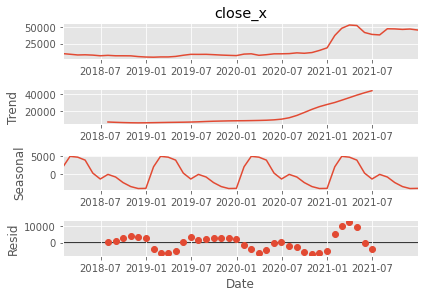

In [8]:
# Checking Stationarity 

plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(df_month.close_x).plot();
plt.xlabel('Date')
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_x)[1])
plt.show()


From the p-value of Dickey-Fuller test, we conclude that the series is not stationary.

### Box-Cox Transformation for Stationarity

Dickey–Fuller test: p=0.857263


Text(0.5, 14.999999999999972, 'Date')

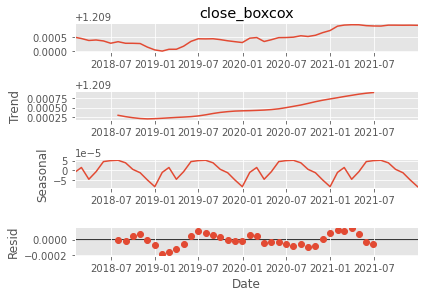

In [9]:
# Box-Cox Transformations

df_month['close_boxcox'], lmbda = stats.boxcox(df_month.close_x)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.close_boxcox)[1])
sm.tsa.seasonal_decompose(df_month.close_boxcox).plot();
plt.xlabel('Date')

### Differencing for Stationarity

In [10]:
# First order differencing

df_month.diff1 = df_month.close_x.diff()
print("Dickey–Fuller test: p=%f" % adfuller(df_month.diff1[1:])[1])

Dickey–Fuller test: p=0.839730


In [11]:
# Second order differencing

df_month.diff2 = df_month.close_boxcox.diff(2).dropna()
print("Dickey–Fuller test: p=%f" % adfuller(df_month.diff2[2:])[1])

Dickey–Fuller test: p=0.001811


Basis the second order differencing, we observe that the time series data is stationary as p-value is less than 0.05

### Plotting Autocorrelation (ACF) & Partial Autocorrelation (PACF) Plots

Autocorrelation  refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit. 

After plotting the ACF plot we move to Partial Autocorrelation Function plots (PACF). A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.


Source: https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06]

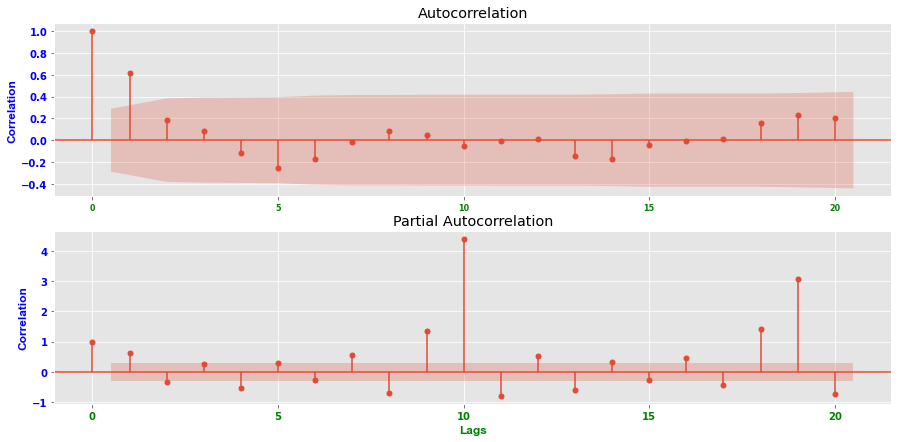

In [12]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots

plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.diff2, lags=20, ax=ax)
plt.ylabel('Correlation',color='blue', fontfamily = 'arial', fontsize=12,fontweight= 'bold')

plt.xticks(color='green',size=8,fontweight= 'bold')
plt.yticks(color='blue',size=10,fontweight= 'bold')
ax = plt.subplot(212)
plt.ylabel('Correlation',color='blue', fontfamily = 'arial', fontsize=12,fontweight= 'bold')
plt.xticks(color='green',size=10,fontweight= 'bold')
plt.yticks(color='blue',size=10,fontweight= 'bold')
sm.graphics.tsa.plot_pacf(df_month.diff2, lags=20,  ax=ax)
plt.xlabel('Lags',color='green',fontsize=12, fontfamily = 'arial',fontweight= 'bold')

plt.show()



From the above plots, we derive that ther is one significant lag for ACF plot, while there are many significant spikes in the PACF plot. Further, we could see a seasonal component present as well in the above plots.

In such a case, we decided to apply the ARIMA model which also takes consideration the seasonality element, a technique called the SARIMA modelling.

### SARIMA Modelling

In [13]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

54

In [14]:
# Model Selection

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.close_x, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [15]:
# Best Models

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
48  (2, 2, 0, 0)  674.931214
49  (2, 2, 0, 1)  677.135019
50  (2, 2, 1, 0)  677.663050
52  (2, 2, 2, 0)  678.506572
51  (2, 2, 1, 1)  679.131393
                                      SARIMAX Results                                      
Dep. Variable:                             close_x   No. Observations:                   48
Model:             SARIMAX(2, 1, 2)x(0, 1, [], 12)   Log Likelihood                -332.466
Date:                             Sat, 02 Oct 2021   AIC                            674.931
Time:                                     23:42:46   BIC                            682.708
Sample:                                 01-31-2018   HQIC                           677.616
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

From the above result, we observe that ar.L1, ar.L2 and ma.L2 have significant values

### Analysis of Results

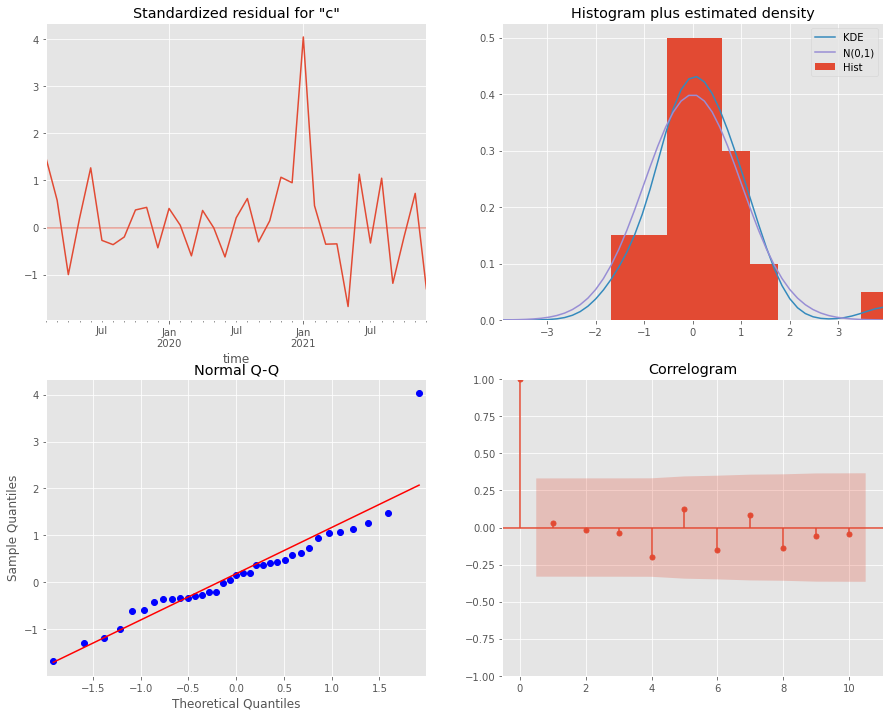

In [16]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Dickey–Fuller test:: p=0.000003


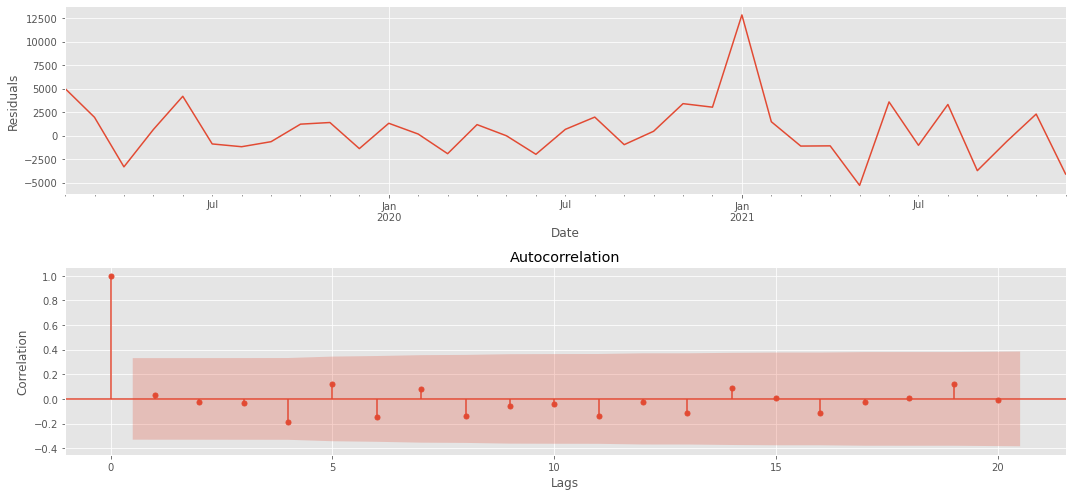

In [17]:
# STL-decomposition

plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.xlabel('Date')
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)
plt.xlabel('Lags')
plt.ylabel('Correlation')

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

### Prediction  - BTC Close Price

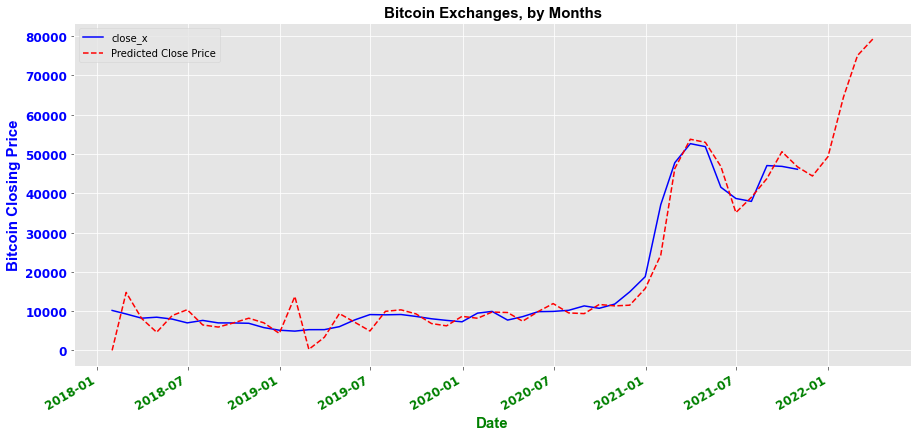

In [22]:
# Prediction

df_month2 = df_month[['close_x']]
date_list = [datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31),datetime(2022, 1, 31),datetime(2022, 2, 28),datetime(2022, 3, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=75)
plt.figure(figsize=(15,7))
df_month2.close_x.plot(color='b')
df_month2.forecast.plot(color='r', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin Exchanges, by Months',fontfamily = 'arial', fontsize=15,fontweight= 'bold')
plt.ylabel('Bitcoin Closing Price',color = 'blue', fontfamily = 'arial', fontsize=15,fontweight= 'bold')
plt.xlabel('Date',color='green',fontfamily = 'arial', fontsize=15,fontweight= 'bold')
plt.xticks(color='green',size=12,fontweight= 'semibold')
plt.yticks(color='blue',size=12,fontweight= 'semibold')
plt.show()


### Evaluation of Results

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error

def check_error(orig, pred, name_col='', index_name=''):
    
    bias = np.mean(orig - pred)
    mse = mean_squared_error(orig, pred)
    rmse = sqrt(mean_squared_error(orig, pred))
    mae = mean_absolute_error(orig, pred)
    mape = np.mean(np.abs((orig - pred) / orig)) * 100
    
    error_group = [bias, mse, rmse, mae, mape]
    series = pd.DataFrame(error_group, index=['BIAS','MSE','RMSE','MAE', 'MAPE'], columns=[name_col])
    series.index.name = index_name
    
    return series

In [20]:
df_month3 = df_month2[['close_x','forecast']].dropna()
orig = df_month3['close_x']
pred = df_month3['forecast']
check_error(orig, pred)

,
,
BIAS,3.471538e+02
MSE,1.262135e+07
RMSE,3.552655e+03
MAE,2.449138e+03
MAPE,2.293001e+01


<b> Conclusion: The SARIMA modelling predicts BTC close price with an average error of 3552.66</b>